# **Оптимизаторы**

## 1. Доступные оптимизаторы в tensorflow.keras.optimizers.legacy:
- SGD
- RMSProp
- Adam
- Adadelta 
- Adagrad
- Adamax
- Nadam
- Ftrl

Рассмотрим каждый из оптимизаторов отдельно

### 1. SGD
- СУТЬ: обновление весовых коэффициентов нейронной сети с использованием единственного примера i обучающей выборки на каждом шаге.
- ПРЕИМУЩЕСТВА:
    - Не производит лишних вычислений (в отличие от классического градиентного спуска)
- НЕДОСТАТКИ:
    - Может быть медленным на большом количестве данных обучения
    - Застревает в локальных оптимумах
    - Сильно колеблется во время обучения
    - Сложно подобрать оптимальные параметры: слишком маленькие будут замедлять обучение, слишком большие будут препятствовать сходимости
    
Чтобы эти минусы исправить, необходимо понижать скорость обучения модели, но это явно не эффективно (проигрывает другим оптимизаторам)

**ВЫВОД**: скорее всего, на больших данных он сработает плохо, но возможно стоит проверить

Далее будут описаны оптимизаторы, друг из друга вытекающие

### 2.  Adagrad (адаптивный градиент)
- СУТЬ: адаптация SGD: алгоритм уменьшает обновления для элементов, которые и так часто обновляются, и увеличивает обновления для параметров, которые почти не обновлялись.
- ПРЕИМУЩЕСТВА:
    - исключает необходимость изменения скорости обучения вручную (как это было в SGD)
- НЕДОСТАТКИ:
    - Накопление суммы квадратов градиентов, отчего уменьшается коэффициент обучения, и в итоге процесс обучения останавливается

**Вывод**: неэффективный оптимизатор, дальнейшие его улучшения покажут себя лучше

### 3. RMSProp
- СУТЬ: расширение AdaGrad, где адаптируется размер шага индивидуально для каждого веса, чтобы модель не привыкала к определенным параметрам. Нормы градиентов не просто складываются, а усредняются в скользящем режиме.
- ПРЕИМУЩЕСТВА:
    - Эффективнее AdaGrad
    - Тоже не требует ручной настройки скорости обучения
- НЕДОСТАТКИ:
    - Новых недостатков относительно AdaGrad не возникает

**Вывод**: стоит проверить на практике

### 4. Adadelta
- СУТЬ: расширение AdaGrad, в котором вместо суммы градиентов сохраняется усредненный квадрат истории градиента, чтобы избежать замедления обучения
- ПРЕИМУЩЕСТВА:
    - Эффективнее AdaGrad
    - Тоже не требует ручной настройки скорости обучения
- НЕДОСТАТКИ:
    - Новых недостатков относительно AdaGrad не возникает

**Вывод**: стоит проверить на практике

### 5. Adam
- СУТЬ: Adam = Momentum(метод моментов для ускорения процесса обучения) + RMSprop.
- ПРЕИМУЩЕСТВА:
    - Включает в себя все достоинства вышеперечисленных оптимизаторов
    - Часто используется на практике
- НЕДОСТАТКИ:
    - Может требоваться большой объём памяти, так как Adam нужно много различных параметров
    - Чтобы восстановить модель из чекпоинта, необходимо сохранять не только веса модели, но и накопленные параметры Adam, чтобы он не считал их заново
    
**Вывод**: скорее всего, этот оптимизатор будет показывать себя лучше остальных. Стоит проверить на практике.

### 6. Adamax
- СУТЬ: вариант оптимизации по Adam, но без ограничений по норме

Благодаря способности регулировать скорость обучения на основе характеристик данных, он подходит для изучения изменяющегося во времени процесса, например, речевых данных с динамически изменяющимися шумовыми условиями. 

**Вывод**: скорее всего, этот вариант нам не подойдет

### 7. Nadam
- СУТЬ: развитие оптимизатора Adam – добавление момента Нестерова при вычислении градиентов.

**Вывод**: стоит проверить на практике, потому что очевидных минусов у этого оптимизатора нет

### 8. Ftrl

Разработан в Google для прогнозирования рейтинга кликов в начале 2010-х годов. Он больше всего подходит для неглубоких моделей с большими и разреженными пространственными элементами.

**Вывод**: этот оптимизатор не будет показывать себя хорошо на больших данных, поэтому он нам вряд ли подходит

## Вывод: 

Были выбраны следующие оптимизаторы для проверки на практике: SGD, RMSProp, AdaDelta, Adam.

 ## 2. Рассмотрим параметры выбранных оптимизаторов:

### 1. SGD
Самые важные параметры:
- Learning Rate
- Momentum 
- Nesterov

### 2. RMSProp
Самые важные параметры:
- Learning Rate
- RHO (его лучше оставить дефолтным)
- Momentum

### 3. AdaDelta
Самые важные параметры:
- Learning Rate
- RHO

### 4. Adam
Самые важные параметры:
- Learning Rate
- beta_1 (лучше дефолтный)
- beta_2 (лучше дефолтный)
- weight_decay

Learning Rate играет огромную роль в любом оптимизаторе. Его эффективнее писать не через floating point, a через LearningRateSchedule.

Другие параметры в основном не играют большой роли, кроме momentum в SGD и RMSProp и nesterov в SGD  (фактически это ещё один оптимизатор NAG, который должен работать лучше обычного SGD) и weight_decay в adam.

## 3. Напишем модели, которые покажут каждый оптимизатор на практике

Проведем несколько экспериментов:
1. Оптимизаторы в чистом виде, без измененных параметров
2. Каждый оптимизатор с измененными параметрами
3. Добавление регуляризации весов

#### Напишем саму модель

Импорт необходимых библиотек

In [6]:
! pip install tensorflow_addons livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import sys

import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import tensorflow_addons as tfa
import torchvision as tv
import matplotlib.pyplot as plt

from livelossplot import PlotLossesKeras

sys.path.append('../../')

from core.datasets import get_ds
from core.make_answer import make_ans_file

Сделаем аугментацию, которая была 4-й по accuracy среди проверенных:

In [8]:
transformer = tv.transforms.Compose([
    tv.transforms.RandomPosterize(bits=6, p=0.4),
    tv.transforms.RandomAffine(degrees=(-15, 15), translate=(0, 0.1), scale=(0.85, 1))
])

Загружаем датасет без битых пикселей:

In [9]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test', transform=transformer, batch_size=100, one_hot=True, back=2)

Посмотрим на картинки в трейне:

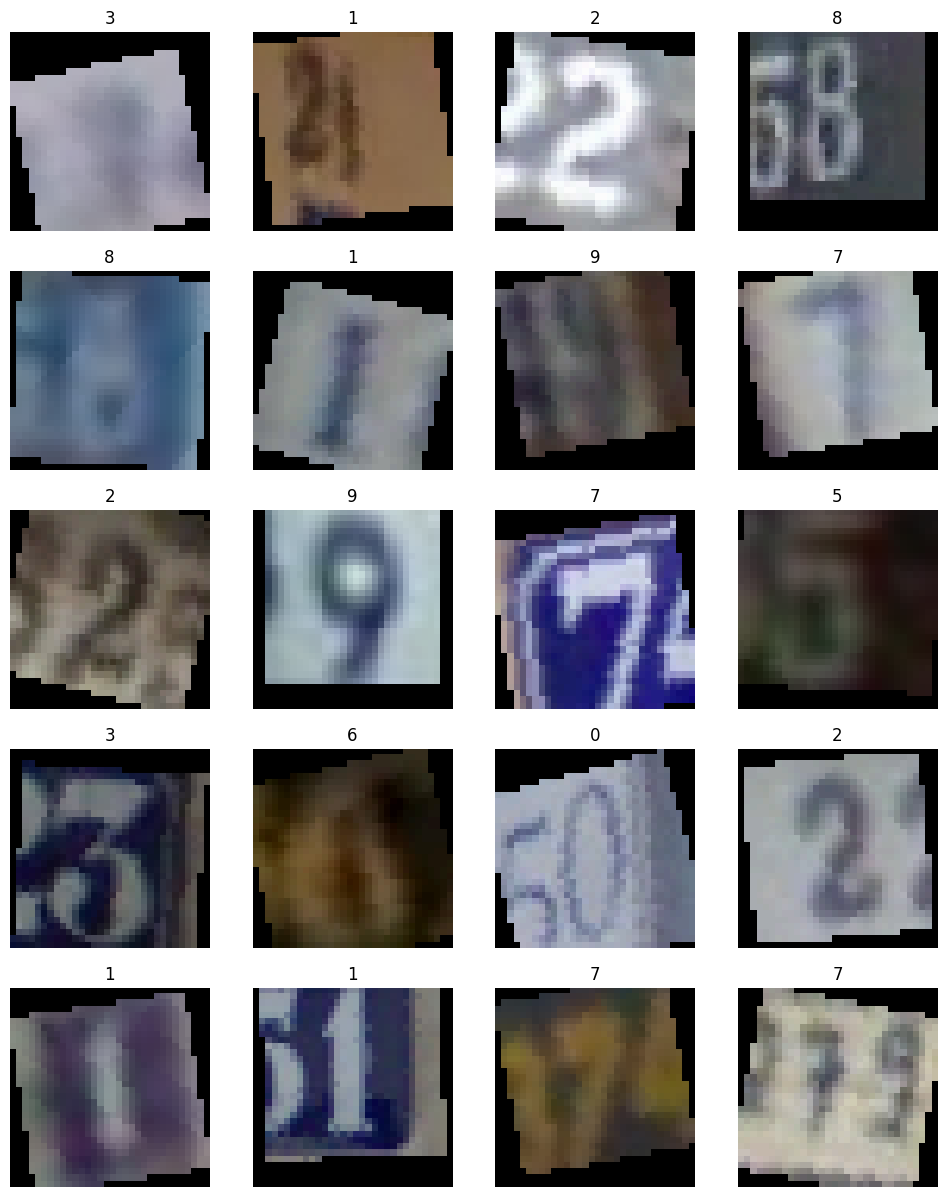

In [10]:
plt.figure(figsize=(12, 15))
train_ds_visualization = train_ds[0]
for i in range(20):
    plt.subplot(5, 4, i + 1)
    img = np.array(Image.fromarray((train_ds_visualization[0][i] * 255).astype(np.uint8), 'RGB'))
    plt.imshow(img / 255, cmap=plt.cm.binary)
    plt.title(np.argmax(train_ds_visualization[1][i]))
    plt.axis('off')
plt.show()

Функция по созданию модели:

In [11]:
def new_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3), batch_size=512),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
    ])
    return model

Первым делом проверим каждый оптимизатор без параметров

In [12]:
history_all = {}

metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]

model = new_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (512, 30, 30, 32)         896       
                                                                 
 conv2d_1 (Conv2D)           (512, 28, 28, 64)         18496     
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 64)        256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (512, 14, 14, 64)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (512, 12, 12, 128)        73856     
                                                                 
 average_pooling2d_1 (Averag  (512, 6, 6, 128)         0

Функция обучения модели с определенным оптимизатором:

In [13]:
def learning(optimizer, ep):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    
    metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]
    callbacks = [PlotLossesKeras()]

    model = new_model()
    model.compile(optimizer=tfa.optimizers.MovingAverage(optimizer), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
    
    return model.fit(train_ds, epochs=ep, validation_data=val_ds, callbacks=callbacks, verbose=1)

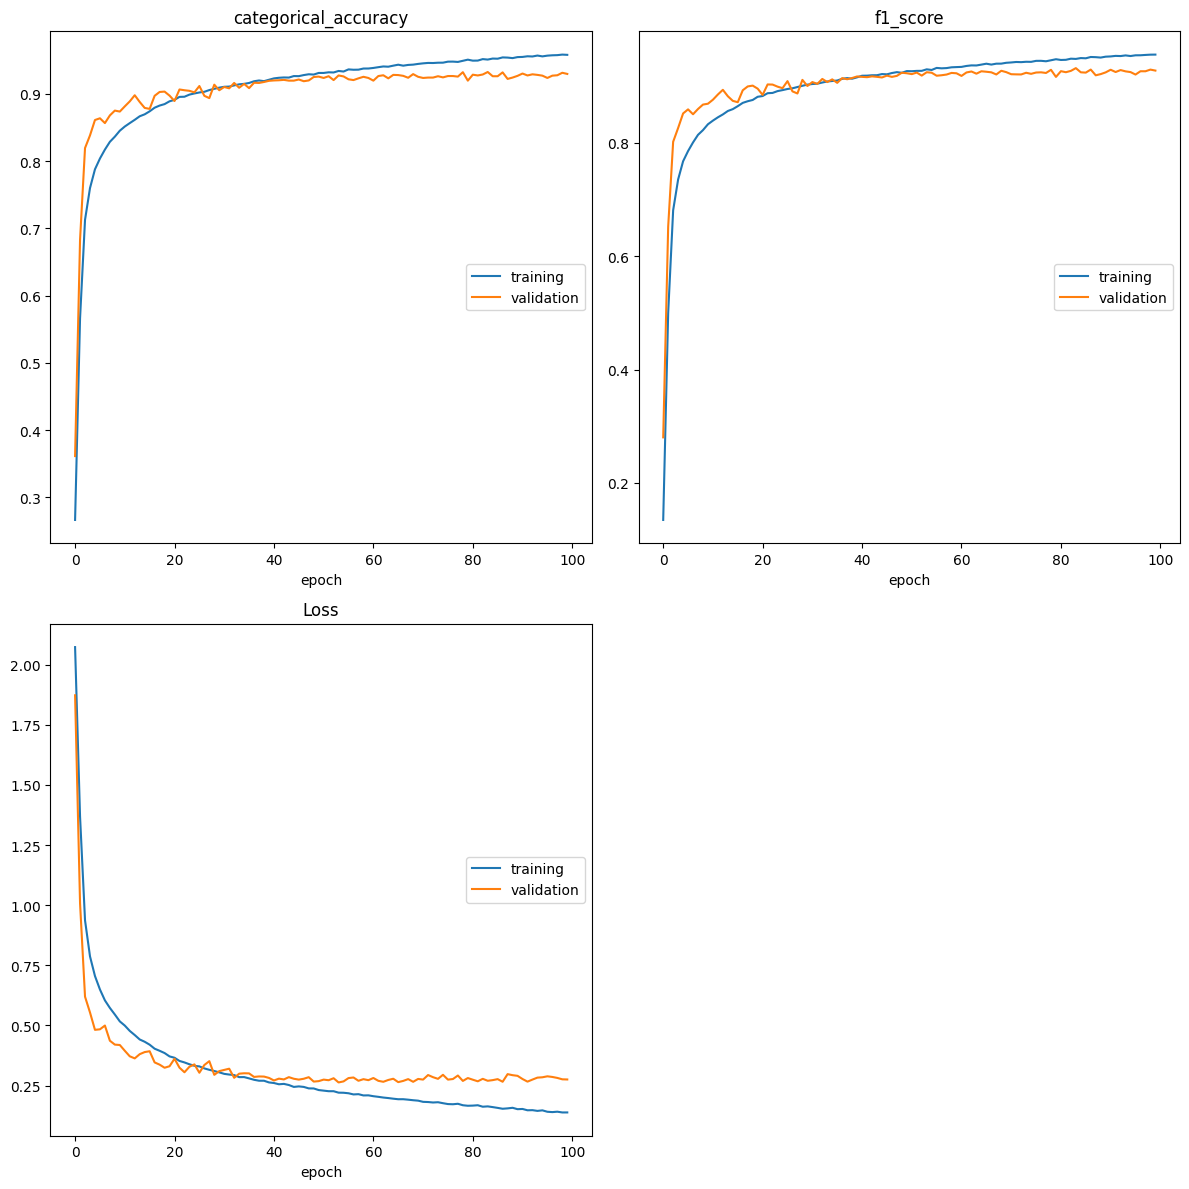

categorical_accuracy
	training         	 (min:    0.266, max:    0.958, cur:    0.958)
	validation       	 (min:    0.361, max:    0.933, cur:    0.930)
f1_score
	training         	 (min:    0.135, max:    0.955, cur:    0.955)
	validation       	 (min:    0.280, max:    0.931, cur:    0.927)
Loss
	training         	 (min:    0.138, max:    2.073, cur:    0.138)
	validation       	 (min:    0.263, max:    1.873, cur:    0.275)
465/465 [==============================] - 20s 43ms/step - loss: 0.1380 - categorical_accuracy: 0.9581 - f1_score: 0.9553 - val_loss: 0.2751 - val_categorical_accuracy: 0.9297 - val_f1_score: 0.9271


In [ ]:
# SGD
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD()
history_all['sgd'] = learning(optimizer, epochs)

**Вывод**: Модель достаточно неплохо обучается, но метрики не самые лучшие

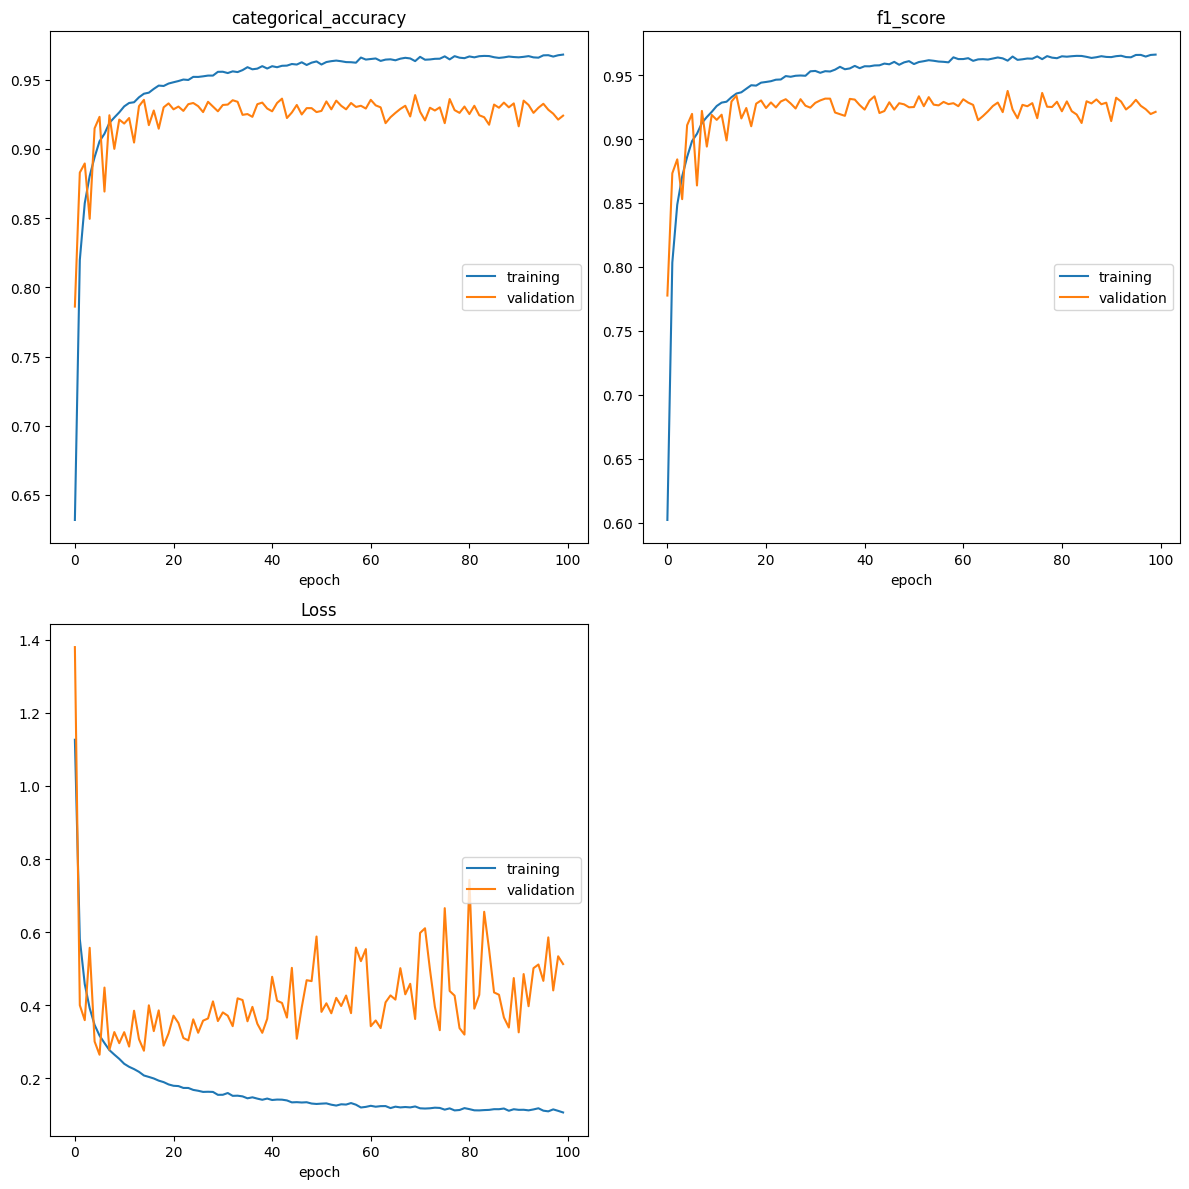

categorical_accuracy
	training         	 (min:    0.632, max:    0.968, cur:    0.968)
	validation       	 (min:    0.786, max:    0.939, cur:    0.924)
f1_score
	training         	 (min:    0.602, max:    0.966, cur:    0.966)
	validation       	 (min:    0.778, max:    0.938, cur:    0.921)
Loss
	training         	 (min:    0.107, max:    1.126, cur:    0.107)
	validation       	 (min:    0.265, max:    1.379, cur:    0.513)
465/465 [==============================] - 21s 46ms/step - loss: 0.1069 - categorical_accuracy: 0.9681 - f1_score: 0.9660 - val_loss: 0.5127 - val_categorical_accuracy: 0.9240 - val_f1_score: 0.9213


In [ ]:
# RMSProp
epochs = 100
optimizer = tf.keras.optimizers.legacy.RMSprop()
history_all['rmsprop'] = learning(optimizer, epochs)

**Вывод**: По метрикам модель показала себя немного лучше, чем с SGD, но тоже не очень хорошо. Также график обучения менее плавный, чем у предыдущей модели, более выражено переобучение.

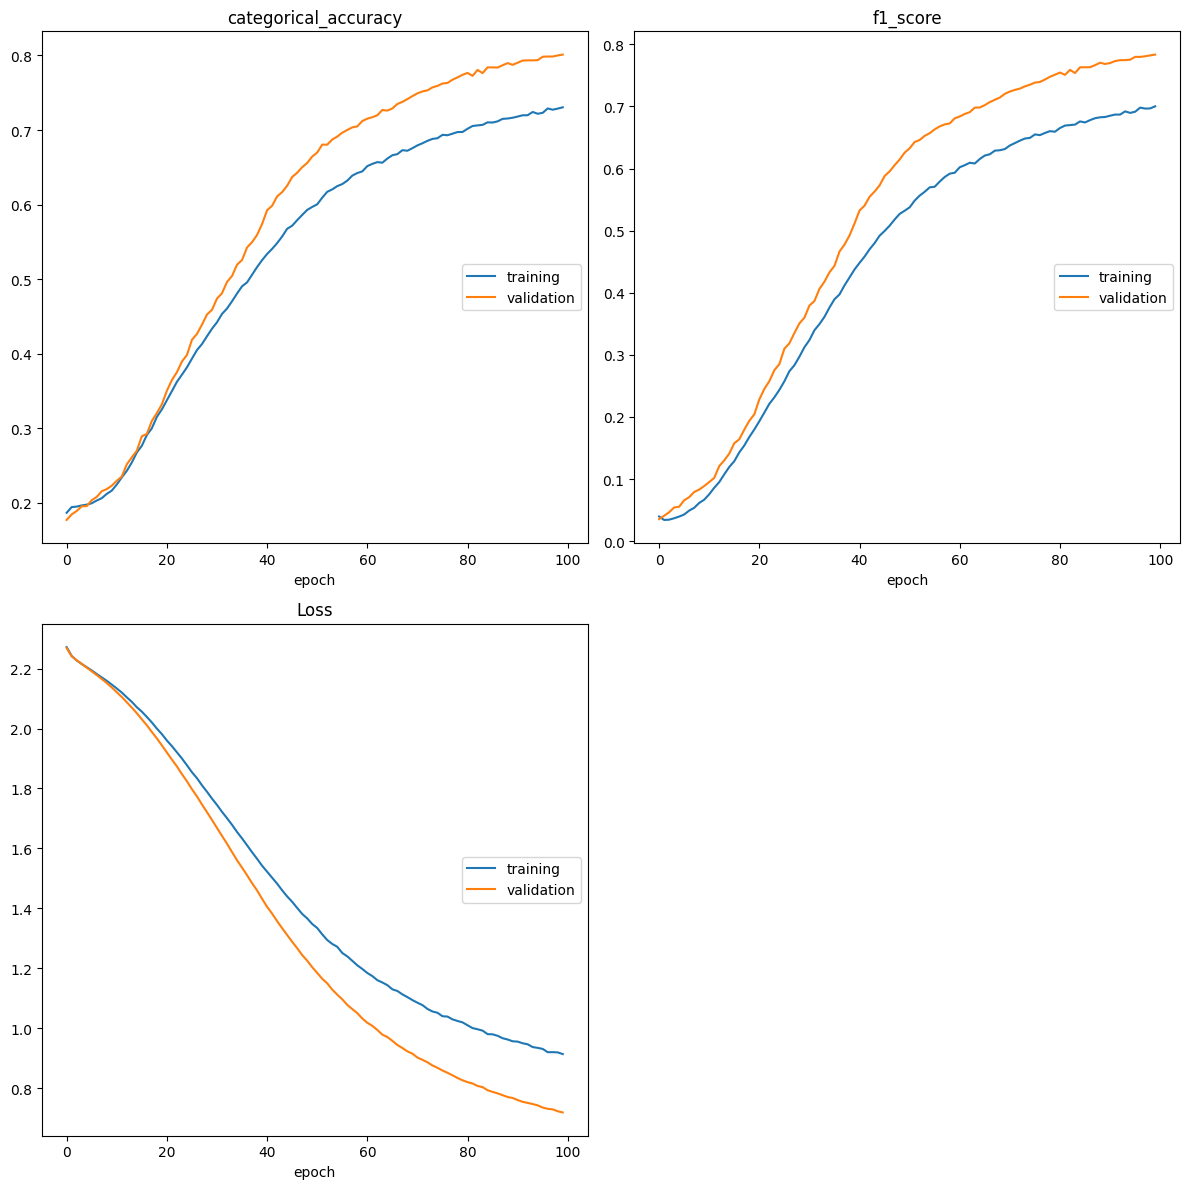

categorical_accuracy
	training         	 (min:    0.186, max:    0.730, cur:    0.730)
	validation       	 (min:    0.177, max:    0.801, cur:    0.801)
f1_score
	training         	 (min:    0.034, max:    0.700, cur:    0.700)
	validation       	 (min:    0.035, max:    0.784, cur:    0.784)
Loss
	training         	 (min:    0.914, max:    2.272, cur:    0.914)
	validation       	 (min:    0.719, max:    2.269, cur:    0.719)
465/465 [==============================] - 20s 44ms/step - loss: 0.9139 - categorical_accuracy: 0.7305 - f1_score: 0.7003 - val_loss: 0.7191 - val_categorical_accuracy: 0.8012 - val_f1_score: 0.7836


In [ ]:
# Adadelta
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adadelta()
history_all['adadelta'] = learning(optimizer, epochs)

**Вывод**: график обучения очень плавный, однако по метрикам модель явно плохая. В дальнейшем этот оптимизатор точно использоваться не будет.

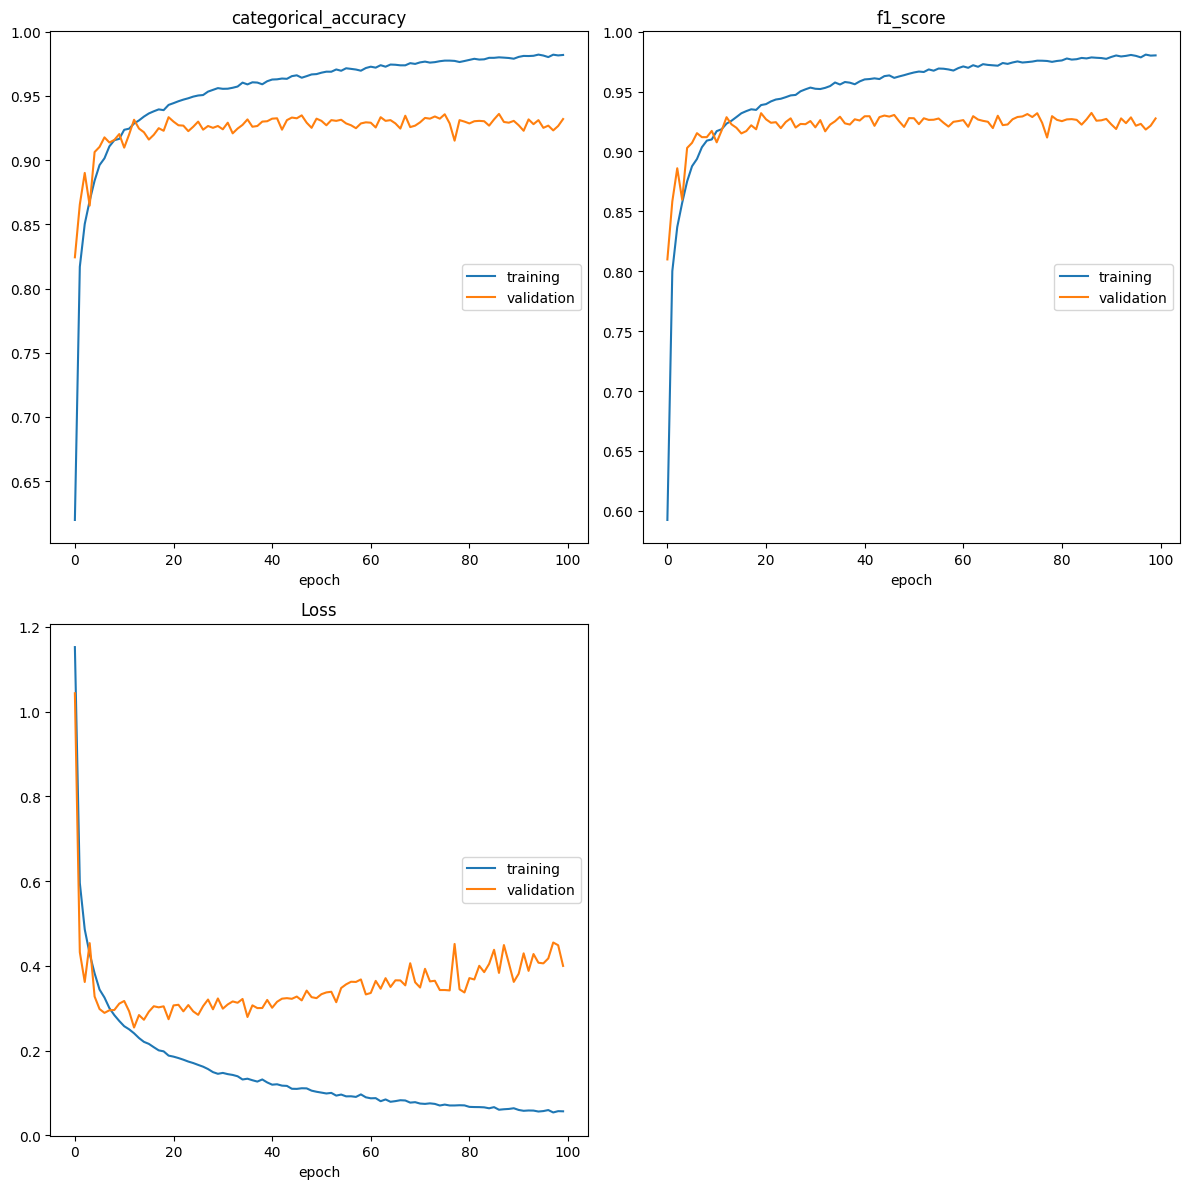

categorical_accuracy
	training         	 (min:    0.620, max:    0.982, cur:    0.982)
	validation       	 (min:    0.824, max:    0.936, cur:    0.932)
f1_score
	training         	 (min:    0.592, max:    0.981, cur:    0.980)
	validation       	 (min:    0.810, max:    0.932, cur:    0.928)
Loss
	training         	 (min:    0.054, max:    1.152, cur:    0.057)
	validation       	 (min:    0.255, max:    1.043, cur:    0.400)
465/465 [==============================] - 22s 47ms/step - loss: 0.0568 - categorical_accuracy: 0.9819 - f1_score: 0.9802 - val_loss: 0.4000 - val_categorical_accuracy: 0.9320 - val_f1_score: 0.9276


In [ ]:
# Adam
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam()
history_all['adam'] = learning(optimizer, epochs)

**Вывод**: по метрикам примерно так же, как и у RMSProp, однако график более стабильный и переобучение немного меньше

Проверю работу двух других оптимизаторов - Momentum и Nesterov, которые реализуются через параметры в оптимизаторе SGD:

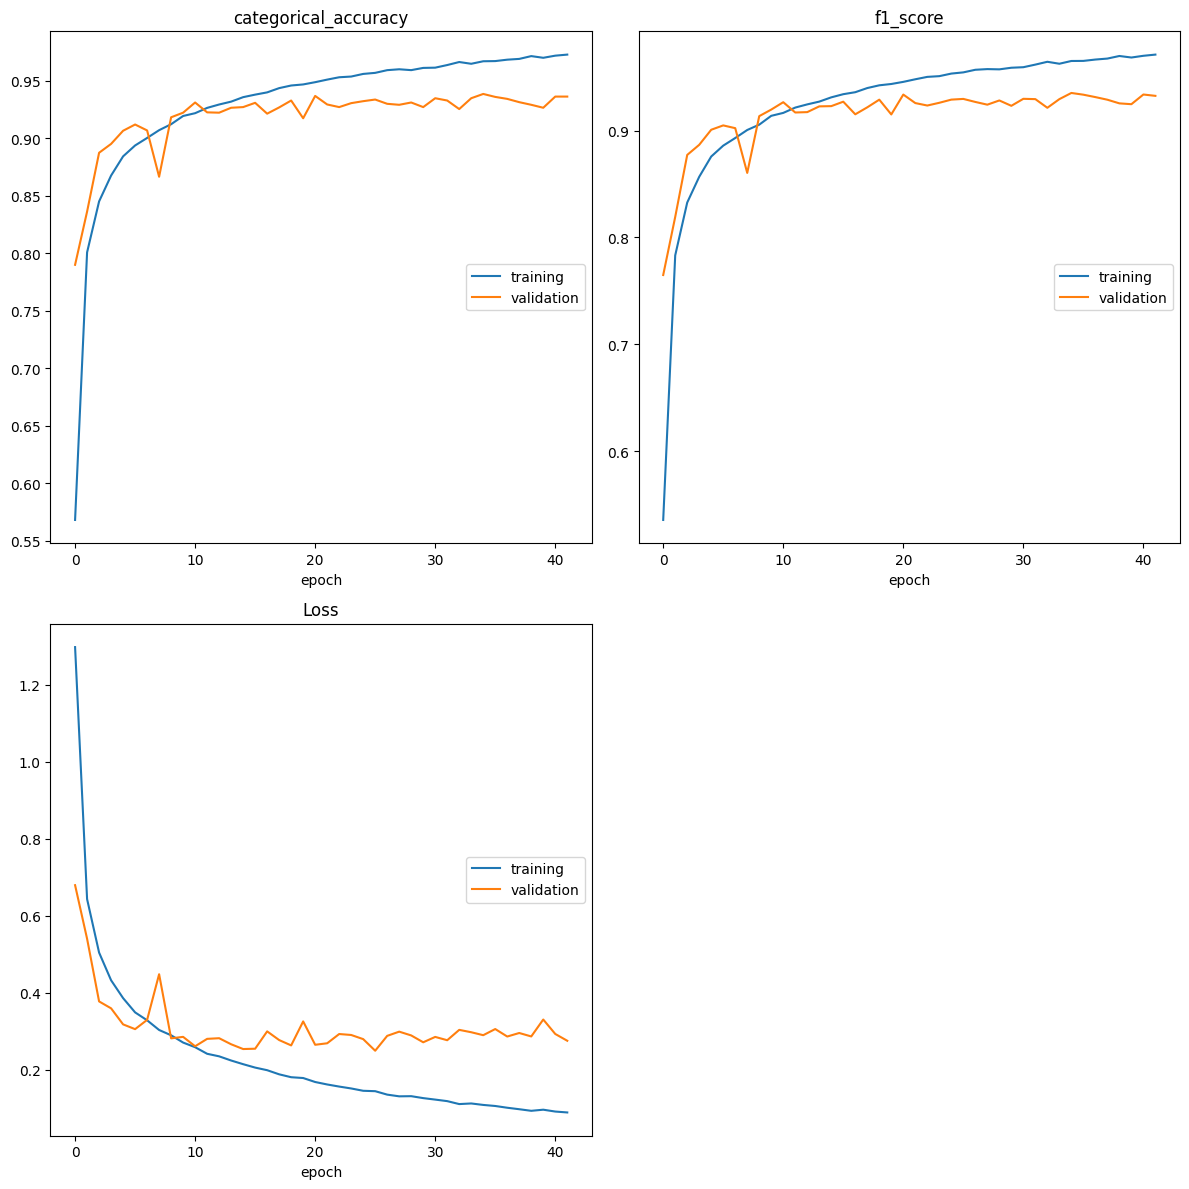

categorical_accuracy
	training         	 (min:    0.568, max:    0.973, cur:    0.973)
	validation       	 (min:    0.790, max:    0.939, cur:    0.936)
f1_score
	training         	 (min:    0.536, max:    0.971, cur:    0.971)
	validation       	 (min:    0.765, max:    0.935, cur:    0.932)
Loss
	training         	 (min:    0.090, max:    1.298, cur:    0.090)
	validation       	 (min:    0.250, max:    0.680, cur:    0.276)
465/465 [==============================] - 19s 40ms/step - loss: 0.0897 - categorical_accuracy: 0.9728 - f1_score: 0.9710 - val_loss: 0.2759 - val_categorical_accuracy: 0.9363 - val_f1_score: 0.9324
Epoch 43/100
431/465 [==========================>...] - ETA: 1s - loss: 0.0867 - categorical_accuracy: 0.9727 - f1_score: 0.9710

In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9)
history_all['momentum'] = learning(optimizer, epochs)

**Вывод**: по сравнению с SGD метрики немного лучше, однако модель менее стабильна и больше переобучается

Проверю работу параметра learning_rate, реализованного через LR_scheduler:

In [14]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    return lr * tf.math.exp(-0.03)

Функция обучения модели с lr_scheduler:

In [15]:
def learning_with_lr(optimizer, ep):
    tf.random.set_seed(1234)
    np.random.seed(1234)


    metrics = ['categorical_accuracy',
           tfa.metrics.F1Score(num_classes=10, average='macro', name='f1_score')]
    callbacks = [PlotLossesKeras(), tf.keras.callbacks.LearningRateScheduler(scheduler)]

    model = new_model()
    model.compile(optimizer=tfa.optimizers.MovingAverage(optimizer), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=metrics)
    
    return model.fit(train_ds, epochs=ep, validation_data=val_ds, callbacks=callbacks, verbose=1)

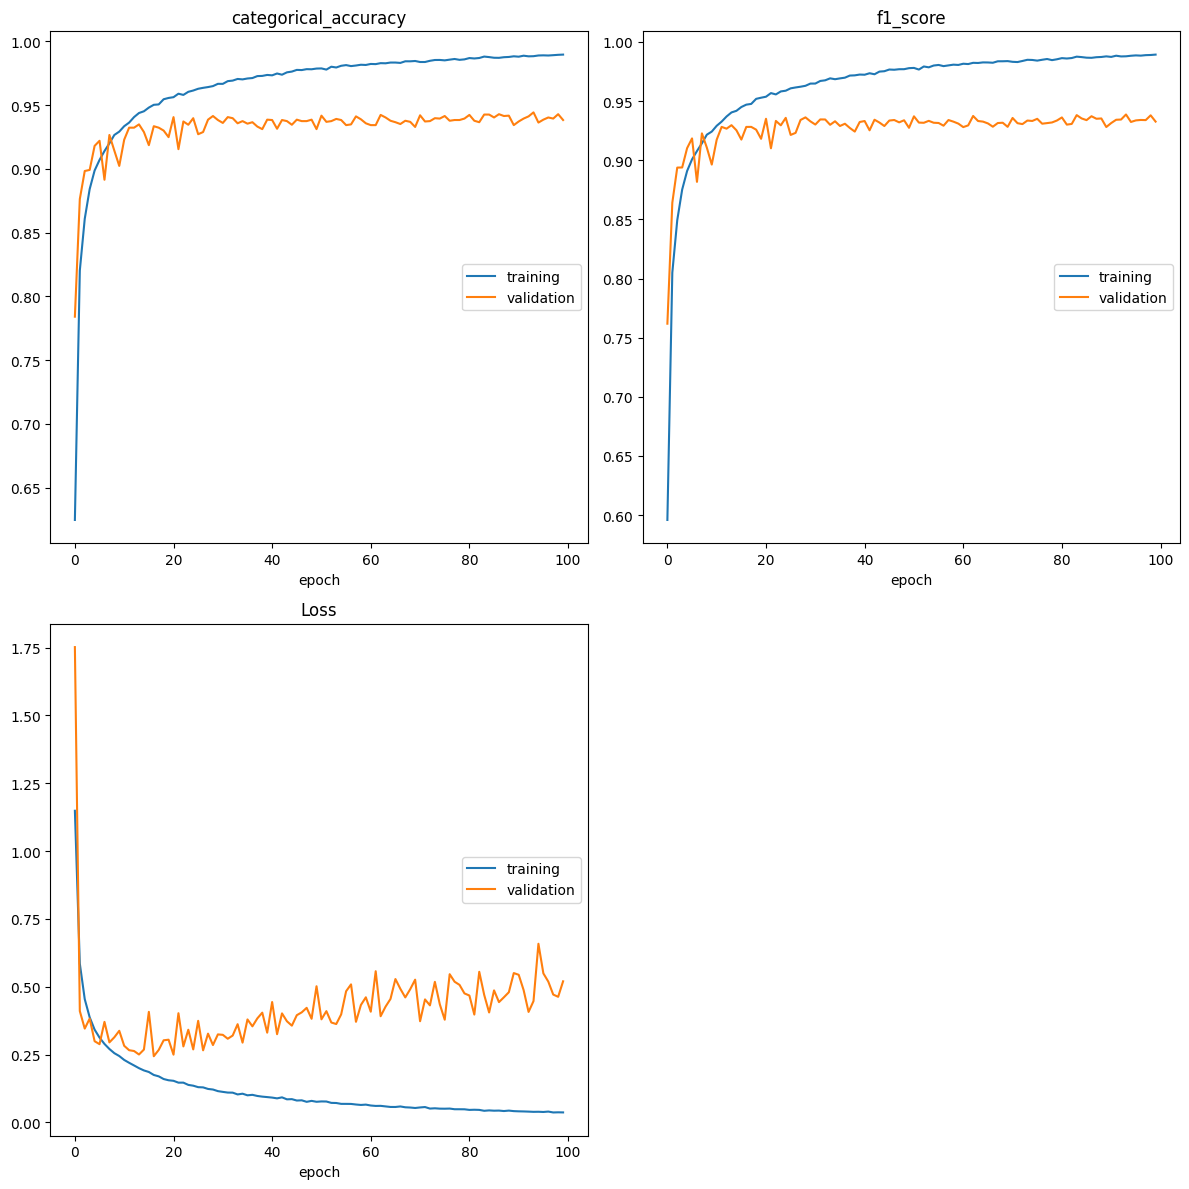

categorical_accuracy
	training         	 (min:    0.625, max:    0.990, cur:    0.990)
	validation       	 (min:    0.784, max:    0.944, cur:    0.938)
f1_score
	training         	 (min:    0.596, max:    0.989, cur:    0.989)
	validation       	 (min:    0.762, max:    0.939, cur:    0.933)
Loss
	training         	 (min:    0.036, max:    1.149, cur:    0.037)
	validation       	 (min:    0.244, max:    1.752, cur:    0.520)
465/465 [==============================] - 17s 37ms/step - loss: 0.0365 - categorical_accuracy: 0.9896 - f1_score: 0.9892 - val_loss: 0.5199 - val_categorical_accuracy: 0.9383 - val_f1_score: 0.9326 - lr: 6.7206e-05


In [16]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.RMSprop()
history_all['rmsprop_lr'] = learning_with_lr(optimizer, epochs)

**Вывод**: эта модель работает явно лучше, чем RMSProp без lr_scheduler. График более стабильный и метрики лучше

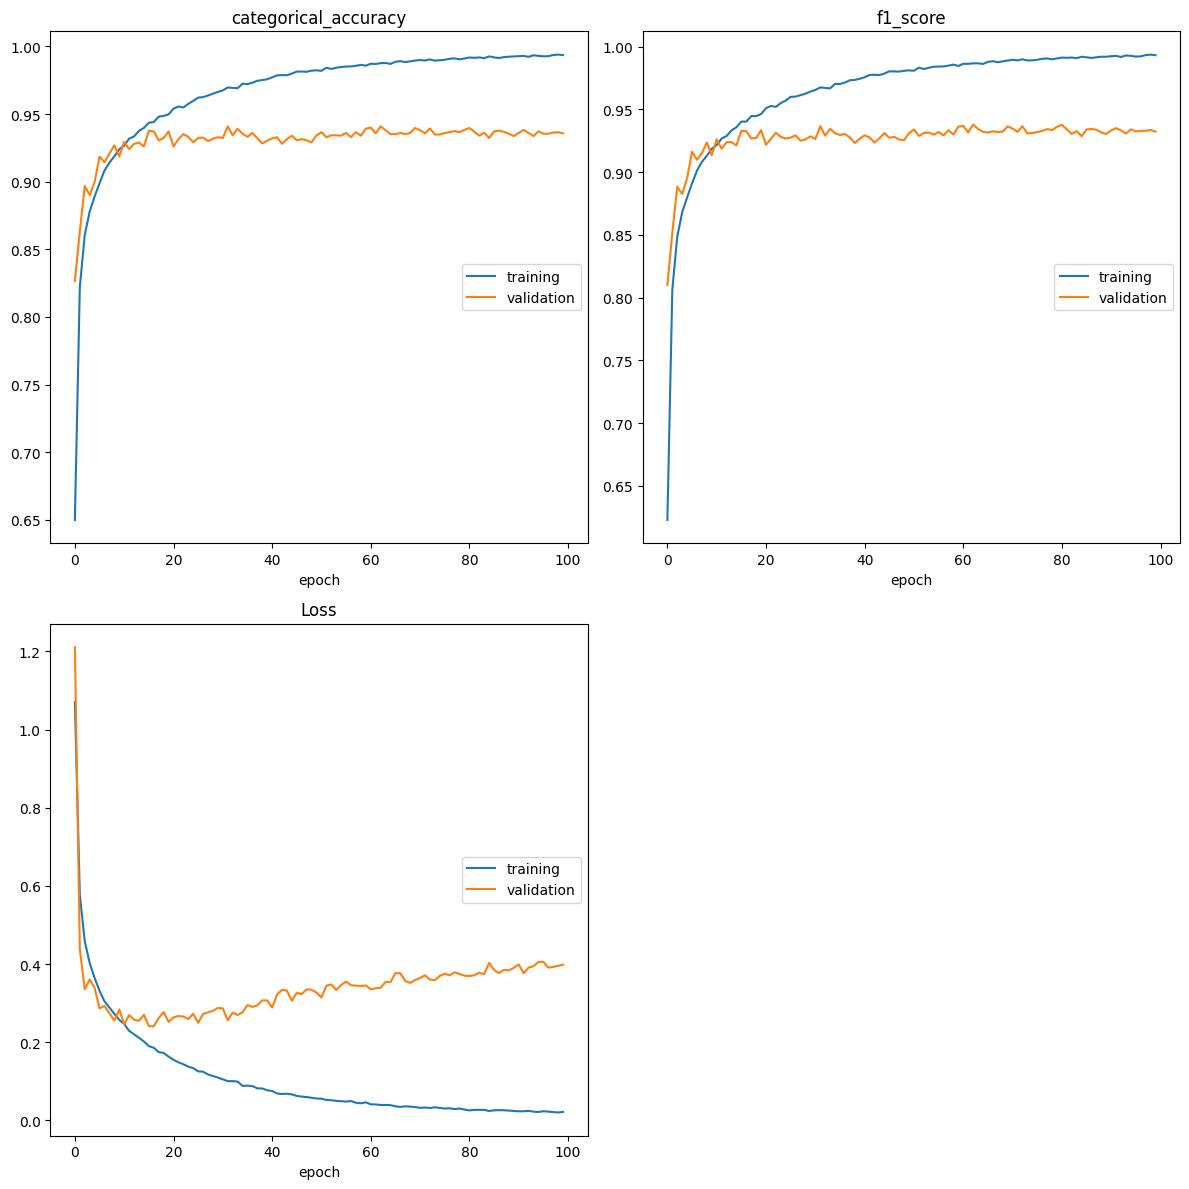

categorical_accuracy
	training         	 (min:    0.650, max:    0.994, cur:    0.994)
	validation       	 (min:    0.827, max:    0.941, cur:    0.936)
f1_score
	training         	 (min:    0.623, max:    0.994, cur:    0.993)
	validation       	 (min:    0.810, max:    0.938, cur:    0.932)
Loss
	training         	 (min:    0.020, max:    1.070, cur:    0.021)
	validation       	 (min:    0.241, max:    1.211, cur:    0.398)
465/465 [==============================] - 17s 36ms/step - loss: 0.0213 - categorical_accuracy: 0.9936 - f1_score: 0.9931 - val_loss: 0.3985 - val_categorical_accuracy: 0.9357 - val_f1_score: 0.9322 - lr: 6.7206e-05


In [17]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam()
history_all['adam_lr'] = learning_with_lr(optimizer, epochs)

**Вывод**: тут метрики слегка похуже, зато график более стабильный и переобучение гораздо меньше

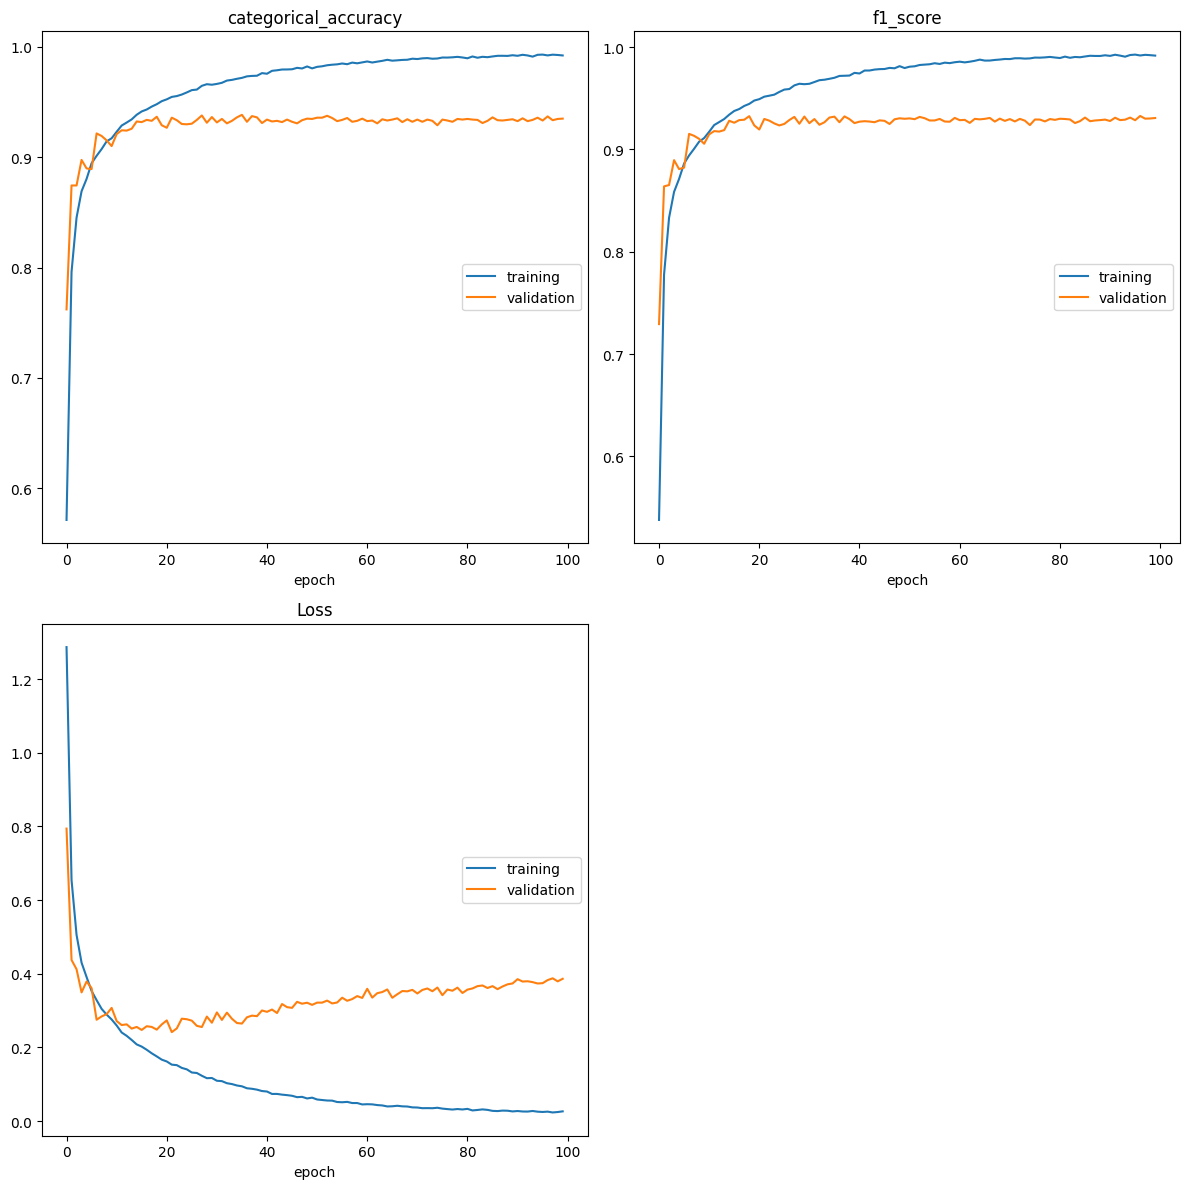

categorical_accuracy
	training         	 (min:    0.571, max:    0.993, cur:    0.992)
	validation       	 (min:    0.762, max:    0.938, cur:    0.935)
f1_score
	training         	 (min:    0.538, max:    0.993, cur:    0.992)
	validation       	 (min:    0.729, max:    0.933, cur:    0.931)
Loss
	training         	 (min:    0.023, max:    1.287, cur:    0.026)
	validation       	 (min:    0.241, max:    0.794, cur:    0.386)
465/465 [==============================] - 16s 35ms/step - loss: 0.0262 - categorical_accuracy: 0.9921 - f1_score: 0.9916 - val_loss: 0.3861 - val_categorical_accuracy: 0.9349 - val_f1_score: 0.9306 - lr: 6.7206e-04


In [18]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9)
history_all['momentum_lr'] = learning_with_lr(optimizer, epochs)

**Вывод**: относительно аналогичной модели без lr_schedulerа метрики не сильно изменились.

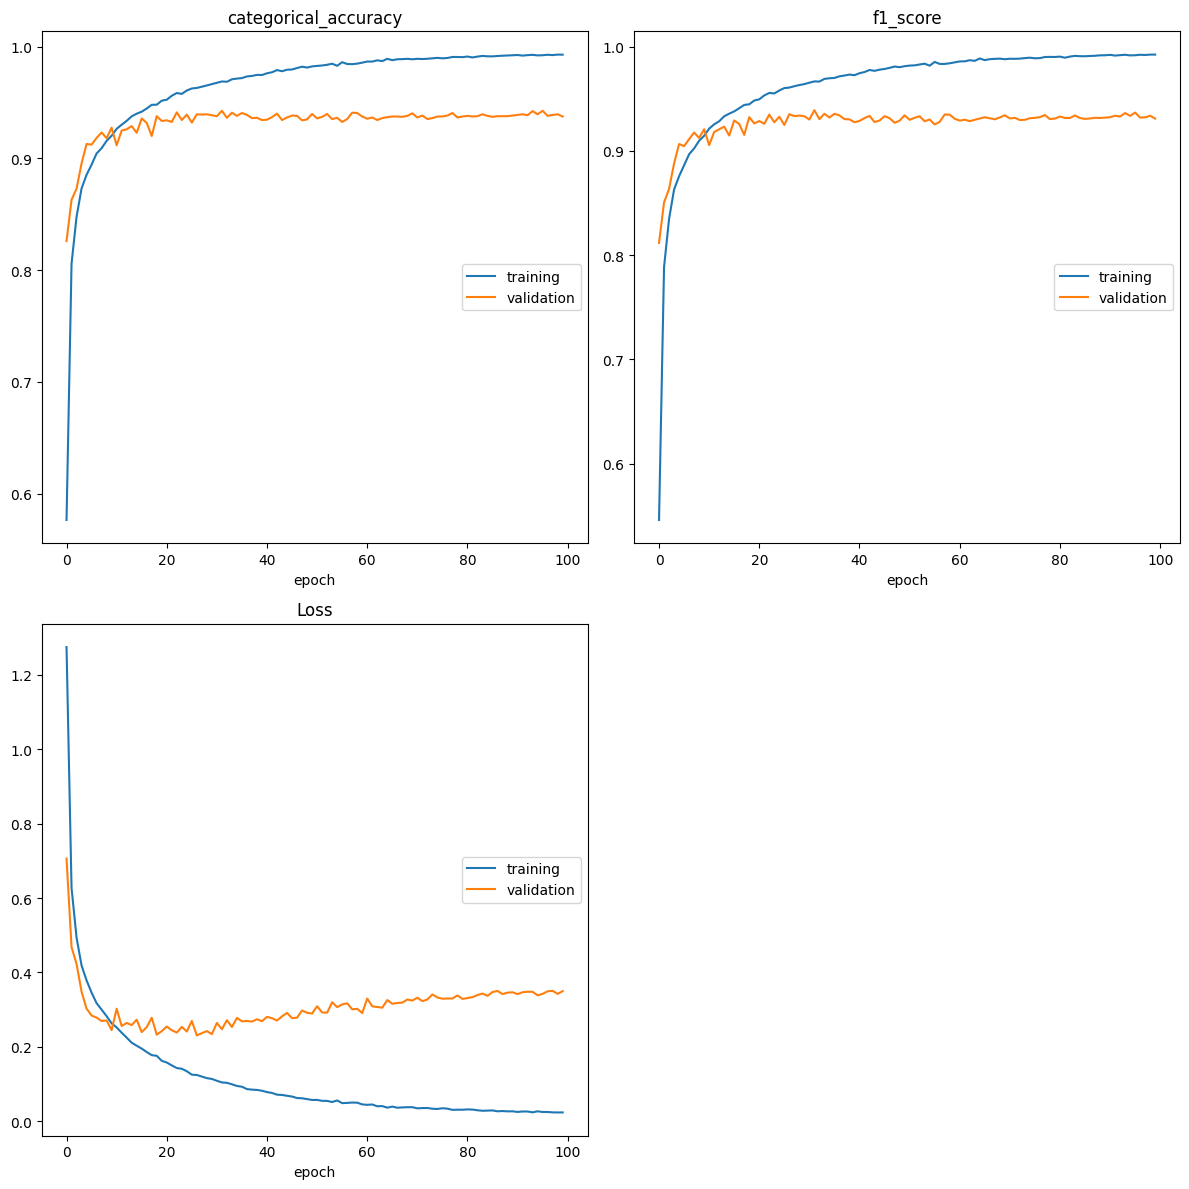

categorical_accuracy
	training         	 (min:    0.577, max:    0.993, cur:    0.993)
	validation       	 (min:    0.826, max:    0.943, cur:    0.937)
f1_score
	training         	 (min:    0.546, max:    0.992, cur:    0.992)
	validation       	 (min:    0.812, max:    0.939, cur:    0.931)
Loss
	training         	 (min:    0.024, max:    1.274, cur:    0.024)
	validation       	 (min:    0.231, max:    0.706, cur:    0.350)
465/465 [==============================] - 17s 36ms/step - loss: 0.0241 - categorical_accuracy: 0.9928 - f1_score: 0.9924 - val_loss: 0.3500 - val_categorical_accuracy: 0.9374 - val_f1_score: 0.9310 - lr: 6.7206e-04


In [19]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9, nesterov=True)
history_all['nesterov_lr'] = learning_with_lr(optimizer, epochs)

**Вывод**: метрики достаточно неплохие, график обучения примерно такой же по стабильности, как и adam 

Рассмотрим ещё один параметр - weight_decay. Он представлен в оптимизаторе adam и выполняет регуляризацию весов в процессе обучения.
Попробуем два разных значения для этого параметра и посмотрим, что лучше

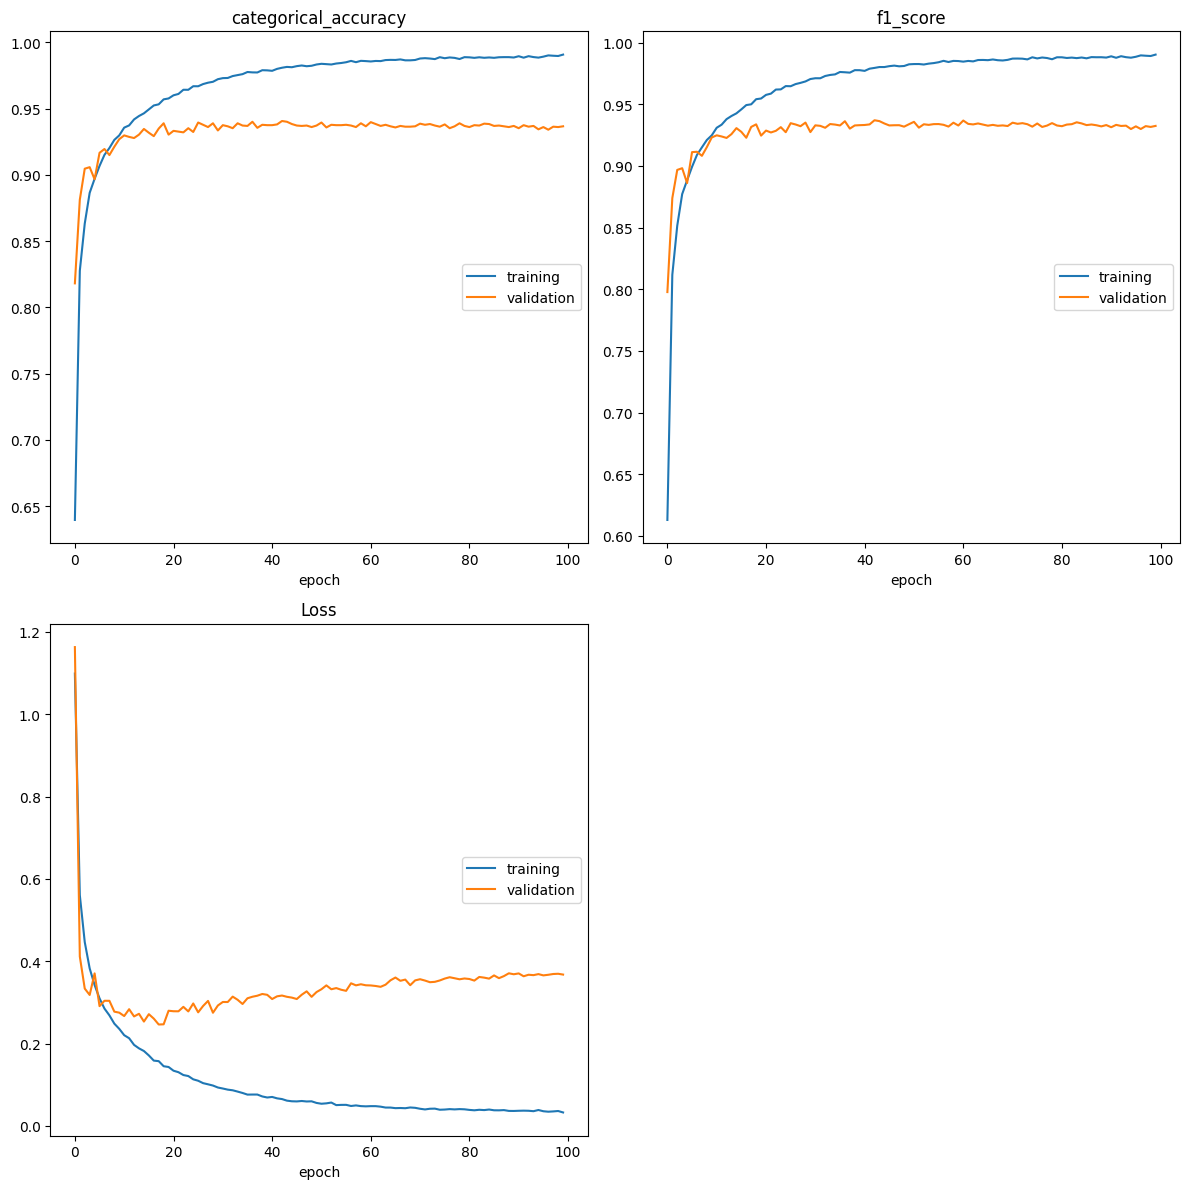

categorical_accuracy
	training         	 (min:    0.639, max:    0.991, cur:    0.991)
	validation       	 (min:    0.818, max:    0.941, cur:    0.937)
f1_score
	training         	 (min:    0.613, max:    0.990, cur:    0.990)
	validation       	 (min:    0.798, max:    0.937, cur:    0.932)
Loss
	training         	 (min:    0.033, max:    1.099, cur:    0.033)
	validation       	 (min:    0.246, max:    1.163, cur:    0.367)
465/465 [==============================] - 19s 42ms/step - loss: 0.0325 - categorical_accuracy: 0.9907 - f1_score: 0.9902 - val_loss: 0.3675 - val_categorical_accuracy: 0.9366 - val_f1_score: 0.9324 - lr: 6.7206e-05


In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam(decay=1e-4)
history_all['adam_wd'] = learning_with_lr(optimizer, epochs)

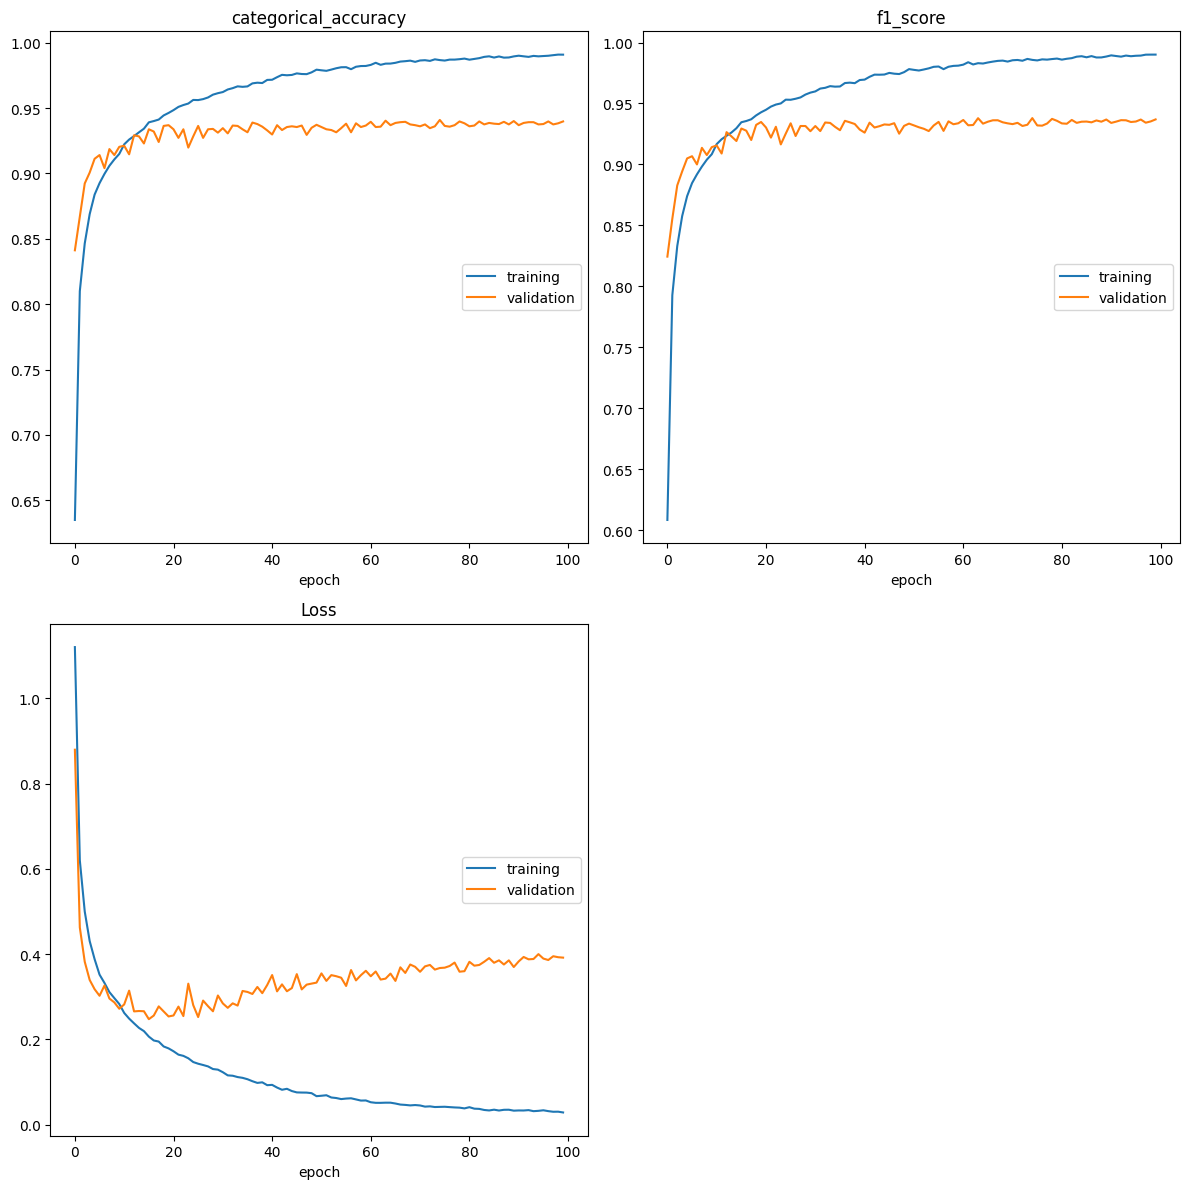

categorical_accuracy
	training         	 (min:    0.635, max:    0.991, cur:    0.991)
	validation       	 (min:    0.841, max:    0.941, cur:    0.940)
f1_score
	training         	 (min:    0.608, max:    0.990, cur:    0.990)
	validation       	 (min:    0.824, max:    0.938, cur:    0.937)
Loss
	training         	 (min:    0.029, max:    1.120, cur:    0.029)
	validation       	 (min:    0.248, max:    0.879, cur:    0.392)
465/465 [==============================] - 20s 42ms/step - loss: 0.0287 - categorical_accuracy: 0.9908 - f1_score: 0.9901 - val_loss: 0.3918 - val_categorical_accuracy: 0.9397 - val_f1_score: 0.9369 - lr: 6.7206e-05


In [ ]:
epochs = 100
optimizer = tf.keras.optimizers.legacy.Adam(decay=3e-6)
history_all['adam_wd_2'] = learning_with_lr(optimizer, epochs)

**Вывод**: оба значения weight_decay дали примерно одинаковые метрики, которые примерно такие же, как и adam без этого параметра.

В итоге, лучшие модели по accuracy оказались:
1. RMSProp с lr_scheduler (0.944)
2. SGD с momentum=0.9, nesterov=True и lr_scheduler (0.943)
2. Adam с lr_scheduler (0.941)
3. Adam с lr_scheduler и с weight_decay (0.941)

В итоге, был выбран оптимизатор **adam** с **lr_scheduler** (c weight_decay и без), потому что модель с этим оптимизатором показывает хорошие метрики и при этом достаточно стабильна, её переобучение меньше, чем у моделей с другими оптимизаторами.